# Machine Learning Assignment

#### <div style="text-align: right">WOORAM JUNG(c1032849)</div>


### Table of Contents in this project
* [1 Data Exploration](#heading_1)
    * [1.1 Cleaning and pre-processing](#heading_1_1)
    * [1.2 Section](#heading_1_2)
        * [1.2.1 Section](#heading_1_2_1)
        * [1.2.2 Section](#heading_1_2_2)
        * [1.2.3 Section](#heading_1_2_3)
* [2 Feature analysis](#heading_2)
    * [2.1 Section](#heading_2_1)
    * [2.2 Section](#heading_2_2) 
* [3 Machine Learning](#heading_3)
    * [3.1 Section](#heading_2_1)
    * [3.2 Section](#heading_2_2) 
* [4 Evaluation](#heading_4)


### 1 Data Exproration <a class="anchor" id="heading_1"></a>
#### 1.1 Cleaning and pre-processing <a class="anchor" id="heading_1_1"></a>


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('cwdata.csv')
encoder = LabelEncoder()

pd.options.display.max_rows = None
pd.options.display.max_columns = None

print(df.head())
df.shape


   Income Post-code Employed Home Owner Education Gender Balance Age  Colour  \
0   10500        C4      NaN          N    School      F     300  25  Yellow   
1   26525        G5        Y          N   College   Male    3500  25   Green   
2    8230        A1        N          N    School      F    1250  25     Red   
3   25000        S5        N          N        U       F    6755  19  Yellow   
4   15250        G7       No          N    School   Male     810  23     Red   

  Fraud  
0     N  
1     N  
2     1  
3     Y  
4     Y  


(120, 10)

In [36]:
"""
find missing data in this result shows that 
'Post-code','Employed','Home Owner','Education','Gender' and 'Balance' 
columns have missing data
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Income      120 non-null    int64 
 1   Post-code   119 non-null    object
 2   Employed    118 non-null    object
 3   Home Owner  117 non-null    object
 4   Education   117 non-null    object
 5   Gender      118 non-null    object
 6   Balance     119 non-null    object
 7   Age         120 non-null    object
 8   Colour      120 non-null    object
 9   Fraud       120 non-null    object
dtypes: int64(1), object(9)
memory usage: 9.5+ KB


In [37]:
df.describe()

,Income
count,120.000000
mean,32803.166667
std,26920.705770
min,5450.000000
25%,12340.000000
50%,24225.000000
75%,45050.000000
max,150600.000000


In [38]:

# how many null? and where?
df.isnull().sum()

Income        0
Post-code     1
Employed      2
Home Owner    3
Education     3
Gender        2
Balance       1
Age           0
Colour        0
Fraud         0
dtype: int64

In [39]:
# handle inconsistencies in variable and fill in missing values with the mode (most frequent value)
df['Education'] = df['Education'].str.strip()
df['Education'] = df['Education'].replace({
    'School': 'S', 
    'College': 'C',
    'Coll': 'C',
    'University': 'U',
    'Uni': 'U',
    '': np.nan})
df['Education'] = df['Education'].fillna(df['Education'].mode().iloc[0])
# transform to numuric data
df['Education'] = encoder.fit_transform(df['Education'].values)
# print(df['Education'])

In [40]:
# handle inconsistencies in variable and fill in missing values with the mode (most frequent value)
df['Employed'] = df['Employed'].fillna(df['Employed'].mode().iloc[0])
df['Employed'] = df['Employed'].replace({'Yes': 'Y', 'No': 'N'})
# transform to numuric data
df['Employed'] = encoder.fit_transform(df['Employed'].values)
# print(df['Employed'])

In [41]:
# handle inconsistencies in variable and fill in missing values with the mode (most frequent value)
df['Home Owner'] = df['Home Owner'].fillna(df['Home Owner'].mode().iloc[0])
df['Home Owner'] = df['Home Owner'].replace({'Yes': 'Y', 'No': 'N'})
# transform to numuric data
df['Home Owner'] = encoder.fit_transform(df['Home Owner'].values)
# print(df['Home Owner'])

In [42]:
# handle inconsistencies
df['Fraud'] = df['Fraud'].replace({ 'No': 'N',  'Yes': 'Y'})
# transform to numuric data
df['Fraud'] = encoder.fit_transform(df['Fraud'].values)
# print(df['Fraud'])

In [43]:
# handle inconsistencies
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Gender'] = df['Gender'].replace({'Male':'M','Female':'F' })
# transform to numuric data
df['Gender'] = encoder.fit_transform(df['Gender'].values)
# print(df['Gender'] )

In [44]:
# fill in missing value with median and convert numuric value
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].median()).round(0)
# print(df['Age'])

In [45]:
# Fill in missing values with the mean and change string to float
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['Balance'] = df['Balance'].fillna(df['Balance'].mean()).round(0)
# print(df['Balance'])

In [46]:
# Fill in missing values with the mode
df['Post-code'] = df['Post-code'].fillna(df['Post-code'].mode().iloc[0])
# transform to numuric data
df['Post-code'] = encoder.fit_transform(df['Post-code'].values)
# print(df['Post-code'])

In [47]:
# handle inconsistencies
df['Colour'] = df['Colour'].replace({'Res':'Red'})
# transform to numuric data
df['Colour'] = encoder.fit_transform(df['Colour'].values)

In [48]:
# Save for backup
# df.to_csv('cleaned_data.csv', index=False) 

In [49]:
#show all cleaned data
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())
print(df.info())

Income          int64
Post-code       int64
Employed        int64
Home Owner      int64
Education       int64
Gender          int64
Balance       float64
Age           float64
Colour          int64
Fraud           int64
dtype: object
Income        0
Post-code     0
Employed      0
Home Owner    0
Education     0
Gender        0
Balance       0
Age           0
Colour        0
Fraud         0
dtype: int64
              Income   Post-code    Employed  Home Owner   Education  \
count     120.000000  120.000000  120.000000  120.000000  120.000000   
mean    32803.166667   38.341667    0.300000    0.325000    1.016667   
std     26920.705770   22.050551    0.460179    0.470339    0.685790   
min      5450.000000    0.000000    0.000000    0.000000    0.000000   
25%     12340.000000   18.750000    0.000000    0.000000    1.000000   
50%     24225.000000   39.000000    0.000000    0.000000    1.000000   
75%     45050.000000   55.250000    1.000000    1.000000    1.000000   
max    150600.000

<AxesSubplot:xlabel='Education', ylabel='Income'>

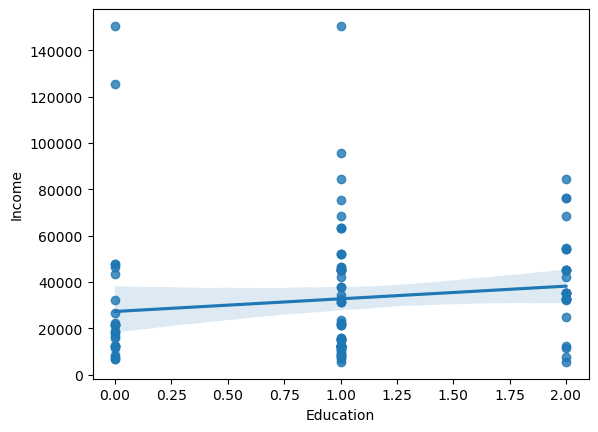

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

data = df
fig, axs = plt.subplots(figsize=(16,8),ncols=4, nrows=2)
for i, feature in enumerate(df.columns):
    row = 

# For regression (predicting 'Income')
# data = df
# X_feature = data['Education']
# y_target = data['Income']

# # split into training data and testing data
# X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

# # Linear regression for predicting 'Income'
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)
# y_pred = linear_reg.predict(X_test)

# # Model evaluation for regression
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print(f"Mean Squared Error for Linear Regression: {mse}")

# plt.figure(figsize=(12, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()